In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1, ) # 2d array to 1d array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
def plot_sample(X, y, index):
  plt.figure(figsize= (15, 2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

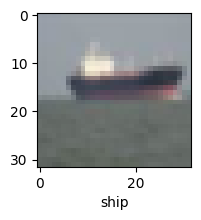

In [13]:
plot_sample(X_train, y_train, 69)

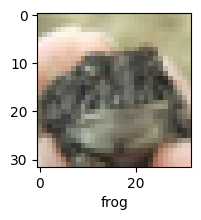

In [14]:
plot_sample(X_train, y_train, 25)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.8143 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.6252 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 184s 117ms/step - loss: 1.5448 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.4847 - accuracy: 0.4743
Epoch 5/5
1563/1563 [==============================] - 241s 154ms/step - loss: 1.4339 - accuracy: 0.4957


In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.4918 - accuracy: 0.4667


[1.4917523860931396, 0.4666999876499176]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
print(y_pred)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 34ms/step
[[0.3108519  0.5618135  0.7827013  ... 0.10936999 0.52784824 0.12843783]
 [0.8486326  0.9751255  0.22517362 ... 0.30793965 0.91622627 0.9802848 ]
 [0.9644745  0.94712305 0.30209708 ... 0.2988106  0.954649   0.9160996 ]
 ...
 [0.11840429 0.06692684 0.771578   ... 0.7675397  0.3640515  0.21338995]
 [0.36473575 0.27054262 0.7511518  ... 0.6352625  0.05907142 0.16861293]
 [0.5542694  0.1126352  0.6925455  ... 0.9398507  0.13132225 0.18091041]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.60      0.58      0.59      1000
           2       0.45      0.29      0.36      1000
           3       0.28      0.52      0.37      1000
           4       0.45      0.36      0.40      1000
           5       0.41      0.28      0.34      1000
           6       0.66      0.31      0.42      1000
           7       0.37      0.73      0.

In [21]:
cnn = models.Sequential([

    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4635 - accuracy: 0.4743
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1198 - accuracy: 0.6068
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9902 - accuracy: 0.6538
Epoch 4/5
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9055 - accuracy: 0.6863
Epoch 5/5
1563/1563 [==============================] - 88s 57ms/step - loss: 0.8434 - accuracy: 0.7083


In [22]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9270 - accuracy: 0.6790


[0.9269850850105286, 0.6790000200271606]

In [23]:
y_test = y_test.reshape(-1, )
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

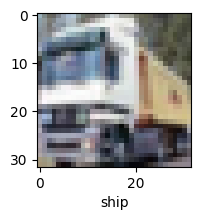

In [24]:
plot_sample(X_test, y_test, 1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[4.0520858e-03, 1.8360476e-04, 1.1890239e-02, 7.4360400e-01,
        2.9198134e-02, 1.6837479e-01, 1.4885716e-02, 2.5999527e-03,
        2.4541829e-02, 6.6953979e-04],
       [1.9529676e-02, 2.0537782e-01, 9.5620198e-05, 4.5919624e-06,
        1.0316261e-05, 7.3081515e-07, 5.0648096e-06, 1.0162382e-06,
        7.6787060e-01, 7.1044085e-03],
       [1.8133499e-01, 2.5446323e-01, 2.2327031e-03, 4.1603711e-03,
        1.9838423e-03, 9.1401243e-04, 4.8876950e-04, 2.2619285e-03,
        5.2416742e-01, 2.7992750e-02],
       [3.7465212e-01, 4.3359123e-02, 4.3277811e-02, 3.2172229e-03,
        2.3316991e-02, 2.7163664e-04, 2.1395425e-03, 8.9818053e-04,
        5.0785136e-01, 1.0160083e-03],
       [1.2484578e-05, 8.9643530e-05, 2.1382442e-02, 3.0794865e-02,
        3.3321387e-01, 6.7357123e-03, 6.0732836e-01, 5.4336349e-05,
        3.4256830e-04, 4.5737339e-05]], dtype=float32)

In [26]:
np.argmax([5, 12, 1, 2])

1

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
 print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.70      1000
           1       0.86      0.72      0.79      1000
           2       0.63      0.51      0.56      1000
           3       0.52      0.43      0.48      1000
           4       0.61      0.66      0.63      1000
           5       0.55      0.70      0.61      1000
           6       0.75      0.77      0.76      1000
           7       0.75      0.72      0.74      1000
           8       0.67      0.83      0.74      1000
           9       0.75      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

